### <i> Geonomic Predictors OF Drug Sensivity In Cancer With Help Of Machine Learning </i>
### <i> Import Library Files </i>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
gdsc_2 = pd.read_csv("GDSC2-dataset.csv")
gdsc = pd.read_csv("GDSC_DATASET.csv")

### <i> Dataset Overview </i>

In [5]:
gdsc_2

,DATASET,NLME_RESULT_ID,NLME_CURVE_ID,COSMIC_ID,CELL_LINE_NAME,SANGER_MODEL_ID,TCGA_DESC,DRUG_ID,DRUG_NAME,PUTATIVE_TARGET,PATHWAY_NAME,COMPANY_ID,WEBRELEASE,MIN_CONC,MAX_CONC,LN_IC50,AUC,RMSE,Z_SCORE
0,GDSC2,343,15946310,683667,PFSK-1,SIDM01132,MB,1003,Camptothecin,TOP1,DNA replication,1046,Y,0.000100,0.1,-1.463887,0.930220,0.089052,0.433123
1,GDSC2,343,15946548,684052,A673,SIDM00848,UNCLASSIFIED,1003,Camptothecin,TOP1,DNA replication,1046,Y,0.000100,0.1,-4.869455,0.614970,0.111351,-1.421100
2,GDSC2,343,15946830,684057,ES5,SIDM00263,UNCLASSIFIED,1003,Camptothecin,TOP1,DNA replication,1046,Y,0.000100,0.1,-3.360586,0.791072,0.142855,-0.599569
3,GDSC2,343,15947087,684059,ES7,SIDM00269,UNCLASSIFIED,1003,Camptothecin,TOP1,DNA replication,1046,Y,0.000100,0.1,-5.044940,0.592660,0.135539,-1.516647
4,GDSC2,343,15947369,684062,EW-11,SIDM00203,UNCLASSIFIED,1003,Camptothecin,TOP1,DNA replication,1046,Y,0.000100,0.1,-3.741991,0.734047,0.128059,-0.807232
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242031,GDSC2,343,16188242,1659928,SNU-175,SIDM00216,COREAD,2499,N-acetyl cysteine,Metabolism,Metabolism,1101,Y,2.001054,2000.0,10.127082,0.976746,0.074498,0.156872
242032,GDSC2,343,16188695,1660034,SNU-407,SIDM00214,COREAD,2499,N-acetyl cysteine,Metabolism,Metabolism,1101,Y,2.001054,2000.0,8.576377,0.913378,0.057821,-1.626959
242033,GDSC2,343,16188953,1660035,SNU-61,SIDM00194,COREAD,2499,N-acetyl cysteine,Metabolism,Metabolism,1101,Y,2.001054,2000.0,10.519636,0.975001,0.058090,0.608442
242034,GDSC2,343,16189493,1674021,SNU-C5,SIDM00498,COREAD,2499,N-acetyl cysteine,Metabolism,Metabolism,1101,Y,2.001054,2000.0,10.694579,0.969969,0.101013,0.809684


In [6]:
gdsc

,COSMIC_ID,CELL_LINE_NAME,TCGA_DESC,DRUG_ID,DRUG_NAME,LN_IC50,AUC,Z_SCORE,GDSC Tissue descriptor 1,GDSC Tissue descriptor 2,Cancer Type (matching TCGA label),Microsatellite instability Status (MSI),Screen Medium,Growth Properties,CNA,Gene Expression,Methylation,TARGET,TARGET_PATHWAY
0,683667,PFSK-1,MB,1003,Camptothecin,-1.463887,0.930220,0.433123,nervous_system,medulloblastoma,MB,MSS/MSI-L,R,Adherent,Y,Y,Y,TOP1,DNA replication
1,684057,ES5,UNCLASSIFIED,1003,Camptothecin,-3.360586,0.791072,-0.599569,bone,ewings_sarcoma,NaN,MSS/MSI-L,R,Adherent,Y,Y,Y,TOP1,DNA replication
2,684059,ES7,UNCLASSIFIED,1003,Camptothecin,-5.044940,0.592660,-1.516647,bone,ewings_sarcoma,NaN,MSS/MSI-L,R,Adherent,Y,Y,Y,TOP1,DNA replication
3,684062,EW-11,UNCLASSIFIED,1003,Camptothecin,-3.741991,0.734047,-0.807232,bone,ewings_sarcoma,NaN,MSS/MSI-L,R,Adherent,Y,Y,Y,TOP1,DNA replication
4,684072,SK-ES-1,UNCLASSIFIED,1003,Camptothecin,-5.142961,0.582439,-1.570016,bone,ewings_sarcoma,NaN,MSS/MSI-L,R,Semi-Adherent,Y,Y,Y,TOP1,DNA replication
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242030,1659928,SNU-175,COREAD,2499,N-acetyl cysteine,10.127082,0.976746,0.156872,large_intestine,large_intestine,COAD/READ,MSI-H,R,Suspension,Y,Y,Y,Metabolism,Metabolism
242031,1660034,SNU-407,COREAD,2499,N-acetyl cysteine,8.576377,0.913378,-1.626959,large_intestine,large_intestine,COAD/READ,MSI-H,R,Adherent,Y,Y,Y,Metabolism,Metabolism
242032,1660035,SNU-61,COREAD,2499,N-acetyl cysteine,10.519636,0.975001,0.608442,large_intestine,large_intestine,COAD/READ,MSS/MSI-L,R,Adherent,Y,Y,Y,Metabolism,Metabolism
242033,1674021,SNU-C5,COREAD,2499,N-acetyl cysteine,10.694579,0.969969,0.809684,large_intestine,large_intestine,COAD/READ,MSI-H,R,Adherent,Y,Y,Y,Metabolism,Metabolism


In [7]:
gdsc_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242036 entries, 0 to 242035
Data columns (total 19 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   DATASET          242036 non-null  object 
 1   NLME_RESULT_ID   242036 non-null  int64  
 2   NLME_CURVE_ID    242036 non-null  int64  
 3   COSMIC_ID        242036 non-null  int64  
 4   CELL_LINE_NAME   242036 non-null  object 
 5   SANGER_MODEL_ID  242036 non-null  object 
 6   TCGA_DESC        240969 non-null  object 
 7   DRUG_ID          242036 non-null  int64  
 8   DRUG_NAME        242036 non-null  object 
 9   PUTATIVE_TARGET  214881 non-null  object 
 10  PATHWAY_NAME     242036 non-null  object 
 11  COMPANY_ID       242036 non-null  int64  
 12  WEBRELEASE       242036 non-null  object 
 13  MIN_CONC         242036 non-null  float64
 14  MAX_CONC         242036 non-null  float64
 15  LN_IC50          242036 non-null  float64
 16  AUC              242036 non-null  floa

In [8]:
gdsc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242035 entries, 0 to 242034
Data columns (total 19 columns):
 #   Column                                   Non-Null Count   Dtype  
---  ------                                   --------------   -----  
 0   COSMIC_ID                                242035 non-null  int64  
 1   CELL_LINE_NAME                           242035 non-null  object 
 2   TCGA_DESC                                240968 non-null  object 
 3   DRUG_ID                                  242035 non-null  int64  
 4   DRUG_NAME                                242035 non-null  object 
 5   LN_IC50                                  242035 non-null  float64
 6   AUC                                      242035 non-null  float64
 7   Z_SCORE                                  242035 non-null  float64
 8   GDSC Tissue descriptor 1                 232669 non-null  object 
 9   GDSC Tissue descriptor 2                 232669 non-null  object 
 10  Cancer Type (matching TCGA label

### <i> Expolatory Data Analysis EDA </i>

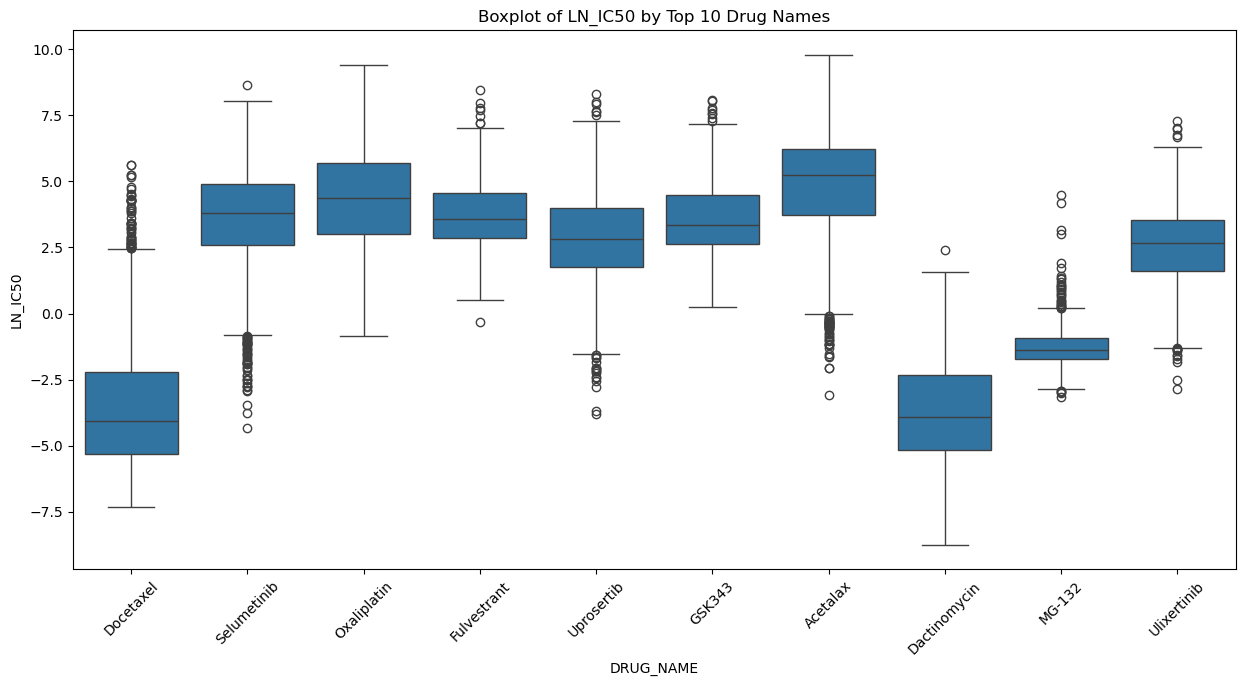

In [10]:
# Boxplot for LN_IC50 by Drug Name
plt.figure(figsize=(15, 7))
top_drugs = gdsc_2['DRUG_NAME'].value_counts().nlargest(10).index
sns.boxplot(data=gdsc_2[gdsc_2['DRUG_NAME'].isin(top_drugs)], x='DRUG_NAME', y='LN_IC50')
plt.title('Boxplot of LN_IC50 by Top 10 Drug Names')
plt.xticks(rotation=45)
plt.show()


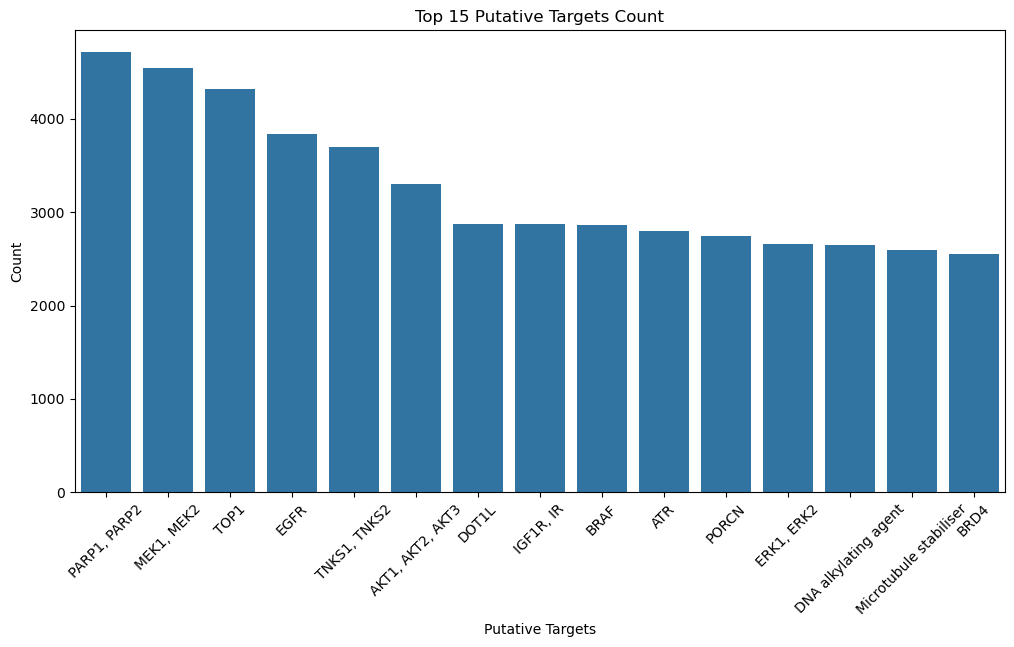

In [11]:
# Countplot for Putative Target
plt.figure(figsize=(12, 6))
putative_target_counts = gdsc_2['PUTATIVE_TARGET'].value_counts().nlargest(15)
sns.barplot(x=putative_target_counts.index, y=putative_target_counts.values)
plt.title('Top 15 Putative Targets Count')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.xlabel('Putative Targets')
plt.show()


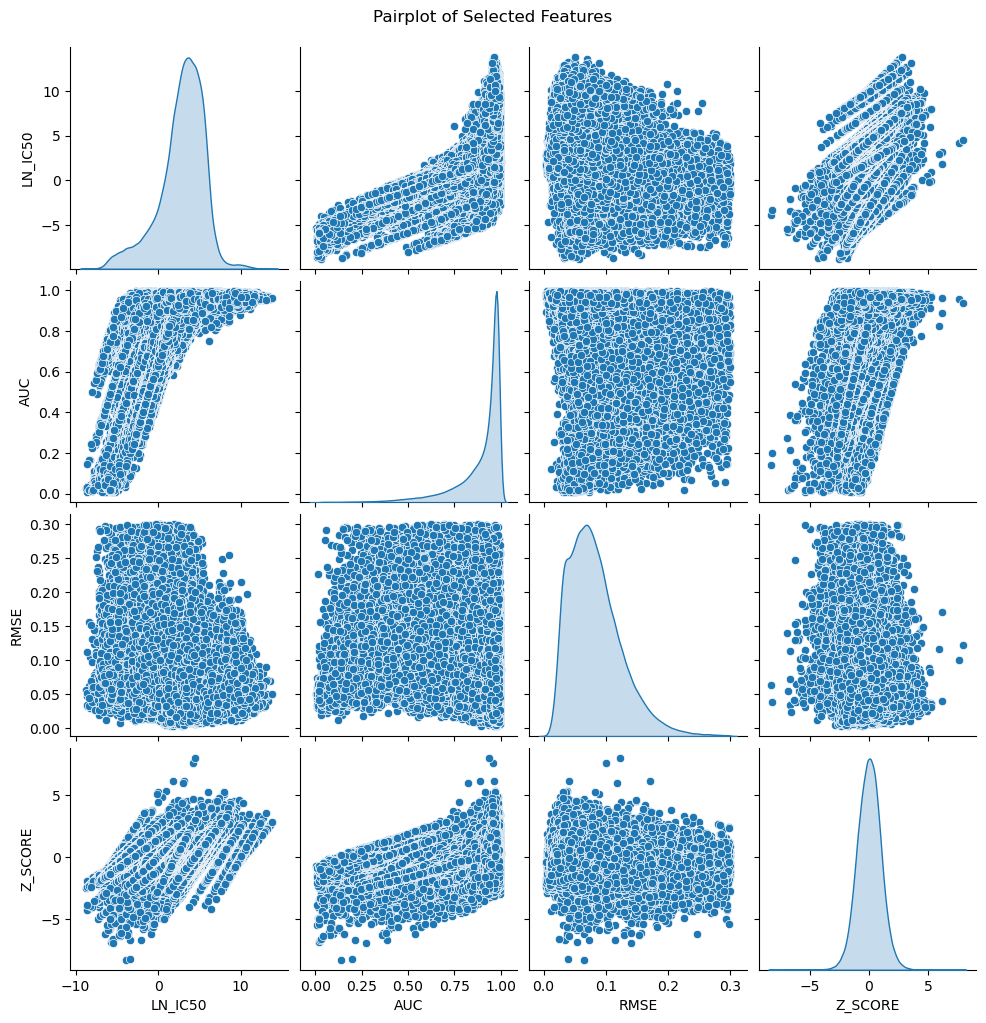

In [12]:
# Pairplot for a subset of features
subset_cols = ['LN_IC50', 'AUC', 'RMSE', 'Z_SCORE']
sns.pairplot(gdsc_2[subset_cols], diag_kind='kde')
plt.suptitle('Pairplot of Selected Features', y=1.02)
plt.show()

### <i> Data Preprocessing </i>

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer

# Display basic information about the dataset
print(gdsc.info())

# 1. Handling Missing Values
# Separate columns based on data types
numeric_cols = gdsc.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = gdsc.select_dtypes(include=['object']).columns

# Numeric Columns: Impute missing values with mean, if there are numeric columns
if not numeric_cols.empty:
    numeric_imputer = SimpleImputer(strategy='mean')
    gdsc[numeric_cols] = numeric_imputer.fit_transform(gdsc[numeric_cols])

# Categorical Columns: Impute missing values with the most frequent value, if there are categorical columns
if not categorical_cols.empty:
    categorical_imputer = SimpleImputer(strategy='most_frequent')
    gdsc[categorical_cols] = categorical_imputer.fit_transform(gdsc[categorical_cols])

# 2. Encoding Categorical Variables
# Using Label Encoding for binary categorical columns and One-Hot Encoding for other categorical columns

# Binary Encoding for columns with only two unique values
binary_cols = [col for col in categorical_cols if gdsc[col].nunique() == 2]
for col in binary_cols:
    le = LabelEncoder()
    gdsc[col] = le.fit_transform(gdsc[col])

# One-Hot Encoding for other categorical columns
non_binary_categorical_cols = [col for col in categorical_cols if col not in binary_cols]
if non_binary_categorical_cols:
    gdsc = pd.get_dummies(gdsc, columns=non_binary_categorical_cols, drop_first=True)

# 3. Feature Scaling for Numerical Features, if there are numeric columns
if not numeric_cols.empty:
    scaler = StandardScaler()
    gdsc[numeric_cols] = scaler.fit_transform(gdsc[numeric_cols])

# 4. Check for any remaining missing values
print("Missing values after preprocessing:")
print(gdsc.isnull().sum().sum())  # Should be 0 if all missing values are handled

# 5. Display the preprocessed dataset info
print(gdsc.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242035 entries, 0 to 242034
Data columns (total 19 columns):
 #   Column                                   Non-Null Count   Dtype  
---  ------                                   --------------   -----  
 0   COSMIC_ID                                242035 non-null  int64  
 1   CELL_LINE_NAME                           242035 non-null  object 
 2   TCGA_DESC                                240968 non-null  object 
 3   DRUG_ID                                  242035 non-null  int64  
 4   DRUG_NAME                                242035 non-null  object 
 5   LN_IC50                                  242035 non-null  float64
 6   AUC                                      242035 non-null  float64
 7   Z_SCORE                                  242035 non-null  float64
 8   GDSC Tissue descriptor 1                 232669 non-null  object 
 9   GDSC Tissue descriptor 2                 232669 non-null  object 
 10  Cancer Type (matching TCGA label

### <i> Models </i>
### <i> Linear Regression </i>

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import numpy as np

# Assuming the preprocessed data is in 'gdsc'
X = gdsc.drop(columns=['LN_IC50'])
y = gdsc['LN_IC50']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Initialize and train the Linear Regression model
linear_model = make_pipeline(StandardScaler(), LinearRegression())
linear_model.fit(X_train, y_train)

# Make predictions
y_pred_linear = linear_model.predict(X_test)

# Evaluate the model
mse_linear = mean_squared_error(y_test, y_pred_linear)
rmse_linear = np.sqrt(mse_linear)
mae_linear = mean_absolute_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

# Display results
print("Linear Regression:")
print(f"Mean Squared Error (MSE): {mse_linear}")
print(f"Root Mean Squared Error (RMSE): {rmse_linear}")
print(f"Mean Absolute Error (MAE): {mae_linear}")
print(f"R2 Score: {r2_linear}\n")



Linear Regression:
Mean Squared Error (MSE): 0.013821325011252758
Root Mean Squared Error (RMSE): 0.11756413148257745
Mean Absolute Error (MAE): 0.07640898966885008
R2 Score: 0.9861777491653235



### <i> Ridge Regression Model </i>

In [18]:
from sklearn.linear_model import Ridge

# Initialize and train the Ridge Regression model
ridge_model = make_pipeline(StandardScaler(), Ridge())
ridge_model.fit(X_train, y_train)

# Make predictions
y_pred_ridge = ridge_model.predict(X_test)

# Evaluate the model
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mse_ridge)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

# Display results
print("Ridge Regression:")
print(f"Mean Squared Error (MSE): {mse_ridge}")
print(f"Root Mean Squared Error (RMSE): {rmse_ridge}")
print(f"Mean Absolute Error (MAE): {mae_ridge}")
print(f"R2 Score: {r2_ridge}\n")

Ridge Regression:
Mean Squared Error (MSE): 0.013726730924848544
Root Mean Squared Error (RMSE): 0.11716113231293279
Mean Absolute Error (MAE): 0.0758842076069195
R2 Score: 0.986272349588126



### <i> SGD Regression Model </i>

In [20]:
from sklearn.linear_model import SGDRegressor

# Initialize and train the SGD Regression model
sgd_model = make_pipeline(StandardScaler(), SGDRegressor(max_iter=1000, tol=1e-3, random_state=42))
sgd_model.fit(X_train, y_train)

# Make predictions
y_pred_sgd = sgd_model.predict(X_test)

# Evaluate the model
mse_sgd = mean_squared_error(y_test, y_pred_sgd)
rmse_sgd = np.sqrt(mse_sgd)
mae_sgd = mean_absolute_error(y_test, y_pred_sgd)
r2_sgd = r2_score(y_test, y_pred_sgd)

# Display results
print("SGD Regression:")
print(f"Mean Squared Error (MSE): {mse_sgd}")
print(f"Root Mean Squared Error (RMSE): {rmse_sgd}")
print(f"Mean Absolute Error (MAE): {mae_sgd}")
print(f"R2 Score: {r2_sgd}\n")


SGD Regression:
Mean Squared Error (MSE): 1.4735387065167522e+21
Root Mean Squared Error (RMSE): 38386699604.377975
Mean Absolute Error (MAE): 476514745.4004473
R2 Score: -1.4736374117168112e+21



The best model based on MAE is: Ridge Regression


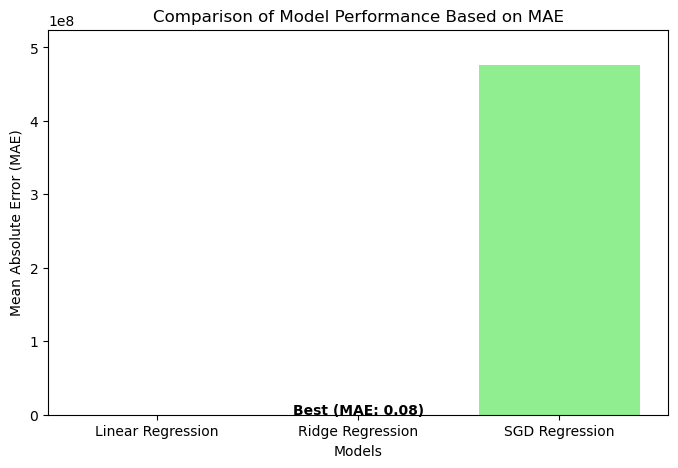

In [39]:
# Compare MAE of each model
models = ['Linear Regression', 'Ridge Regression', 'SGD Regression']
mae_values = [mae_linear, mae_ridge, mae_sgd]

# Determine the best model based on MAE
best_model_index = np.argmin(mae_values)
best_model = models[best_model_index]
print(f"The best model based on MAE is: {best_model}")

# Visualization
plt.figure(figsize=(8, 5))
plt.bar(models, mae_values, color=['skyblue', 'salmon', 'lightgreen'])
plt.xlabel("Models")
plt.ylabel("Mean Absolute Error (MAE)")
plt.title("Comparison of Model Performance Based on MAE")
plt.text(best_model_index, mae_values[best_model_index] + 0.5, f"Best (MAE: {mae_values[best_model_index]:.2f})", 
         ha='center', color='black', weight='bold')
plt.ylim(0, max(mae_values) * 1.1)
plt.show()